<a href="https://colab.research.google.com/github/solangecdh3/assignments/blob/main/assignments_1/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 -  More advanced visualization and some stats

## *Solange Holman*
Netid: sh143991


Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus on Canvas for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

#  Learning Objectives
The purpose of this assignment is to provide practice in fundamental concepts that we will use throughout this course. By completing this assignment, you will...
- Practice **for-loops**, **conditionals**, and **functions** on a familiar dataset (penguins).
- Write reusable **plotting functions** and make more advanced figures.
- Run a lightweight **EDA** (missing data, structure, and visuals) on two new datasets, and **choose one** for our end‑of‑semester *Kaggle* challenge.


We've used most of this knowledge in class, but now it's time to put it together!


*Note: for all assignments, write out all equations and math using markdown and [LaTeX](https://tobi.oetiker.ch/lshort/lshort.pdf). For this assignment show ALL math work*

**ANSWER**

# For-loops, conditionals, and functions!

## 1
**[32 points]** Loading data and gathering insights from a real dataset. In this section, you're asked to **avoid `groupby` / built-ins first** and lean on **for‑loops** and **if/elif/else**. After you finish a loop-based solution, you *may* then check your work with `groupby`.


**Data**. The data for this problem will be the penguins dataset. This time you'll just use `pip install` to load the data.


This dataset consists of 7 columns.

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- bill_length_mm: bill length (mm)
- bill_depth_mm: bill depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin sex



**Your objective**. For this dataset, your goal is to follow these instructions and answer the following questions:


**(a)** Load the penguins dataset using `!pip install palmerpenguins`.  Load the library using `from palmerpenguins import load_penguins` and then load the data using `penguins = load_penguins()`.  

First, load penguins:
`penguins = load_penguins()`. Then standardize expected column names.
`penguins.columns = [c.strip().lower().replace(' ', '_') for c in penguins.columns]`. And preview your work: `penguins.head()`.

_The following questions are worth 8 points each._

**(b)  ** Write a function `mean_by_species_loops(df, column)` that returns a dictionary like `{'Adelie': 190.0, 'Chinstrap': ...}` of the **mean** of `column` for each species, **skipping missing values**, implemented with loops and conditionals (no `groupby`). Starter code provided below.

**(c)** Create a new column `mass_class` with values `'light'`, `'medium'`, or `'heavy'` using **if/elif/else** on `body_mass_g`. Use the **33rd and 66th percentiles** of `body_mass_g` (computed on the full dataset) as cut-points.

Additionally:
- Missing `body_mass_g` should map to `np.nan`.
- **(extra credit +1)** Do this once using **loops** (e.g., iterating rows) and then, if you like, re-implement using **vectorized** code.

Your goal is to populate `mass_class` column and a value count by species and mass class. Starter code provided below.

**(d)** Ok, now let's try to build a nested dictionary of counts for `island` × `mass_class`, e.g.

```python
{
  'Biscoe': {'light': 12, 'medium': 34, 'heavy': 11},
  'Dream':  {'light':  8, 'medium': 17, 'heavy': 15},
  'Torgersen': {...}
}
```

Implement with loops (no `crosstab` / `pivot_table` at first). Started code provided.

**(e)**  Write a reusable function `group_mean_loops(df, by, col)` that returns a dictionary mapping each value of `by` to the **mean** of `col`, **implemented with loops and conditionals**. The goal of this task is to create a general-purpose aggregator. Starter code provided.





**ANSWER**

**1a. Loading in the data**

In [10]:
## For 1a
import pandas as pd
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()

penguins.columns = [c.strip().lower().replace(' ', '_') for c in penguins.columns]
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


**1b. Writing a function**

In [11]:
## For 1b
def mean_by_species_loops(df: pd.DataFrame, column: str) -> dict:
    """Compute mean of `column` per species using loops/conditionals only.
    Returns: dict species -> mean_value (float)
    """

    sums = {}
    counts = {}

    for index, row in df.iterrows():
        species = row['species']
        value = row[column]

        if pd.isna(value):
            continue

        if species not in sums:
            sums[species] = 0
            counts[species] = 0

        sums[species] += value
        counts[species] += 1

    return {sp: (sums[sp] / counts[sp]) for sp in sums if counts[sp] > 0}

# --- Quick check (you may peek AFTER you've implemented the loops):
try:
    loop_means = mean_by_species_loops(penguins, 'flipper_length_mm')
    # Compare to groupby (just for a sanity check)
    gb_means = penguins.dropna(subset=['species','flipper_length_mm']).groupby('species')['flipper_length_mm'].mean().to_dict()
    print('Your loop means:', {k: round(v, 2) for k, v in loop_means.items()})
    print('Groupby means  :', {k: round(v, 2) for k, v in gb_means.items()})
except Exception as e:
    print('Check failed (implement the function first):', e)


Your loop means: {'Adelie': 189.95, 'Gentoo': 217.19, 'Chinstrap': 195.82}
Groupby means  : {'Adelie': 189.95, 'Chinstrap': 195.82, 'Gentoo': 217.19}


**1c. Creating new column**

In [14]:
## for 1c
import numpy as np

q1 = penguins['body_mass_g'].quantile(0.33)
q2 = penguins['body_mass_g'].quantile(0.66)

def classify_mass(value: float) -> str:
    if pd.isna(value):
        return np.nan
    elif value < q1:
        return 'light'
    elif value < q2:
        return 'medium'
    else:
        return 'heavy'

# Loop-based application
mass_labels = []
for _, row in penguins.iterrows():
    mass_labels.append(classify_mass(row.get('body_mass_g')))
penguins['mass_class'] = mass_labels

# Quick check
print(penguins['mass_class'].value_counts(dropna=False).to_frame('count'))


            count
mass_class       
medium        118
heavy         118
light         106
NaN             2


In [19]:
# Extra credit
penguins['mass_class_vec'] = np.select(
    condlist=[penguins['body_mass_g'] < q1, penguins['body_mass_g'] < q2],
    choicelist=['light', 'medium'],
    default='heavy')

penguins.loc[penguins['body_mass_g'].isna(), 'mass_class_vec'] = np.nan

print("Do loop and vectorized methods match?")
comparison = (penguins['mass_class'] == penguins['mass_class_vec']) | (penguins['mass_class'].isna() & penguins['mass_class_vec'].isna())
print(comparison.all())

print("\nVectorized version - value counts by species and mass class:")
print(penguins.groupby(['species', 'mass_class_vec']).size().unstack(fill_value=0))


Do loop and vectorized methods match?
True

Vectorized version - value counts by species and mass class:
mass_class_vec  heavy  light  medium
species                             
Adelie              8     74      69
Chinstrap           3     32      33
Gentoo            107      0      16


**1d. Building a nested dictionary**

In [24]:
## 1d
def island_mass_counts(df: pd.DataFrame) -> dict:
  """
  This function iterates through each row in the dataframe and counts the
    number of penguins in each mass class ('light', 'medium', 'heavy') for
    each island. Rows with missing values in either island or mass_class
    are skipped.
    """

  out = {}

  for _, row in df.iterrows():
        island = row['island']
        mass_class = row['mass_class']

        if pd.isna(island) or pd.isna(mass_class):
            continue

        if island not in out:
            out[island] = {'light': 0, 'medium': 0, 'heavy': 0}

        out[island][mass_class] += 1

  return out

counts_loop = island_mass_counts(penguins)
print(counts_loop)

# Check (after you have a result)
try:
    check = pd.crosstab(penguins['island'], penguins['mass_class'])
    print('\nCrosstab (check):\n', check)
except Exception as e:
    print('Crosstab check skipped:', e)

{'Torgersen': {'light': 25, 'medium': 23, 'heavy': 3}, 'Biscoe': {'light': 19, 'medium': 38, 'heavy': 110}, 'Dream': {'light': 62, 'medium': 57, 'heavy': 5}}

Crosstab (check):
 mass_class  heavy  light  medium
island                          
Biscoe        110     19      38
Dream           5     62      57
Torgersen       3     25      23


**1e. Resusable function**

In [23]:
## 1e

def group_mean_loops(df: pd.DataFrame, by: str, col: str) -> dict:
    """
    Compute mean of `col` for each group defined by `by` column using loops.

    """
    sums, counts = {}, {}

    for _, row in df.iterrows():
        group_value = row[by]
        col_value = row[col]

        if pd.isna(group_value) or pd.isna(col_value):
            continue

        if group_value not in sums:
            sums[group_value] = 0
            counts[group_value] = 0

        sums[group_value] += col_value
        counts[group_value] += 1

    return {g: (sums[g] / counts[g]) for g in sums if counts[g] > 0}

# Quick test
try:
    result = group_mean_loops(penguins, 'island', 'bill_length_mm')
    print({k: round(v, 2) for k, v in result.items()})
except Exception as e:
    print('Implement the function first:', e)

{'Torgersen': 38.95, 'Biscoe': 45.26, 'Dream': 44.17}


# Visualization

## 2
**[20 points]** Visualization


**Data**. Use the `penguins` dataframe for the following questions, again.


**Your objective**. Your goal here is to write your plotting code inside functions that return `(fig, ax)` (or `(fig, axes)` for grids). Aim for publication-quality figures with labeled axes/titles/legends and clear design.

_The following questions are worth 5 points each._

**(a)** Write a function `plot_bill_scatter(df, x='bill_length_mm', y='bill_depth_mm', hue='species')` that:

- Creates a scatter plot of `x` vs `y`.
- Colors points by `hue` (species).
- Adds a least‑squares regression line **per species** (you may use `numpy.polyfit` or a library helper).
- Returns `(fig, ax)`.

**(b)** Write a function `plot_flipper_distribution(df)` that shows the distribution of `flipper_length_mm` by `species` using either:
- A **violin** or **box** plot with
- A jittered overlay of individual points

Then return `(fig, ax)`.

**(c)** Create a function `plot_mass_by_island(df)` that generates **one subplot per island** showing the distribution of `body_mass_g` for each `species` (e.g., side‑by‑side box plots). Return `(fig, axes)`.

**(d)** Write a function `plot_numeric_correlation(df)` that computes the correlation matrix across **numeric columns** only and plots a heatmap (with values annotated). Return `(fig, ax)`.



**ANSWER**


**2a. First function-Scatterplot**

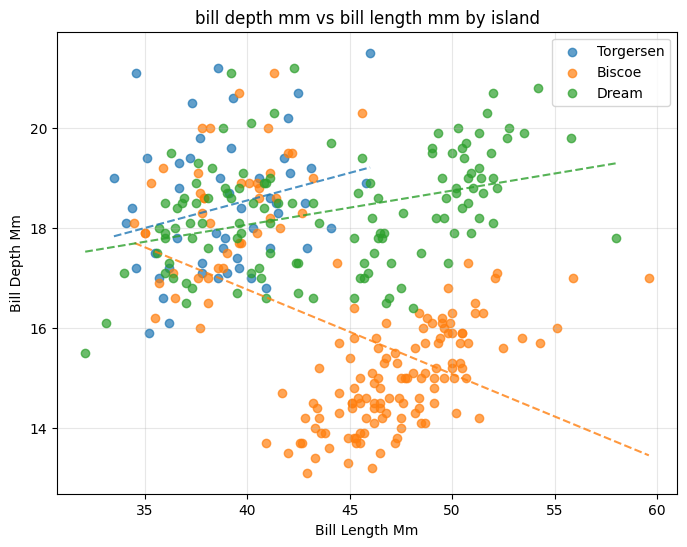

In [28]:
## 2a
import matplotlib.pyplot as plt
import numpy as np

def plot_bill_scatter(df, x='bill_length_mm', y='bill_depth_mm', hue='species'):

    fig, ax = plt.subplots(figsize=(8, 6))

    for species in df[hue].unique():
        if pd.isna(species):
            continue

        species_data = df[df[hue] == species]
        clean_data = species_data.dropna(subset=[x, y])

        if len(clean_data) == 0:
            continue

        ax.scatter(clean_data[x], clean_data[y], label=species, alpha=0.7)

        if len(clean_data) > 1:
            x_vals = clean_data[x].values
            y_vals = clean_data[y].values

            if np.isfinite(x_vals).all() and np.isfinite(y_vals).all():
                try:
                    slope, intercept = np.polyfit(x_vals, y_vals, 1)

                    x_line = np.array([x_vals.min(), x_vals.max()])
                    y_line = slope * x_line + intercept
                    ax.plot(x_line, y_line, linestyle='--', alpha=0.8)
                except (np.linalg.LinAlgError, ValueError):
                    pass

    ax.set_xlabel(x.replace('_', ' ').title())
    ax.set_ylabel(y.replace('_', ' ').title())
    ax.set_title(f'{y.replace("_", " ")} vs {x.replace("_", " ")} by {hue}')
    ax.legend()
    ax.grid(True, alpha=0.3)

    return fig, ax


fig, ax = plot_bill_scatter(penguins, hue='island')
plt.show()

**2b. Second function-Violin plot**

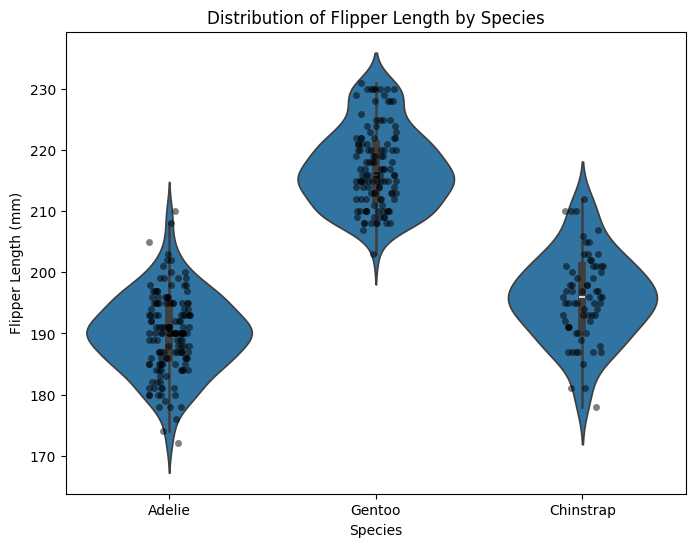

In [31]:
## 2b

import seaborn as sns
import matplotlib.pyplot as plt

def plot_flipper_distribution(df):

    fig, ax = plt.subplots(figsize=(8, 6))

    sns.violinplot(data=df, x='species', y='flipper_length_mm', ax=ax)

    sns.stripplot(data=df, x='species', y='flipper_length_mm',
                  ax=ax, color='black', alpha=0.5, jitter=True)

    ax.set_xlabel('Species')
    ax.set_ylabel('Flipper Length (mm)')
    ax.set_title('Distribution of Flipper Length by Species')

    return fig, ax

fig, ax = plot_flipper_distribution(penguins)
plt.show()


**Third function-Box plots**

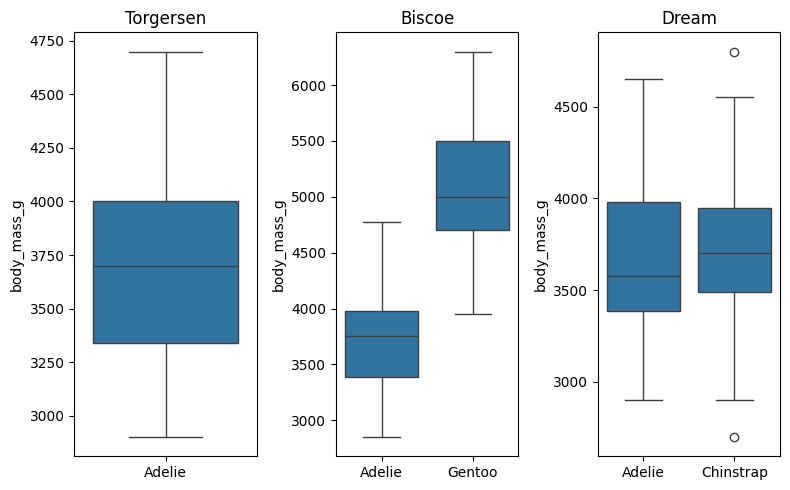

In [34]:
## 2c
def plot_mass_by_island(df):

    islands = df['island'].unique()
    fig, axes = plt.subplots(1, len(islands), figsize=(8, 5))

    for i, island in enumerate(islands):
        island_data = df[df['island'] == island]
        sns.boxplot(data=island_data, x='species', y='body_mass_g', ax=axes[i])
        axes[i].set_title(island)
        axes[i].set_xlabel('')

    plt.tight_layout()
    return fig, axes

fig, axes = plot_mass_by_island(penguins)
plt.show()

**2d. Fourth function-Heatmap**

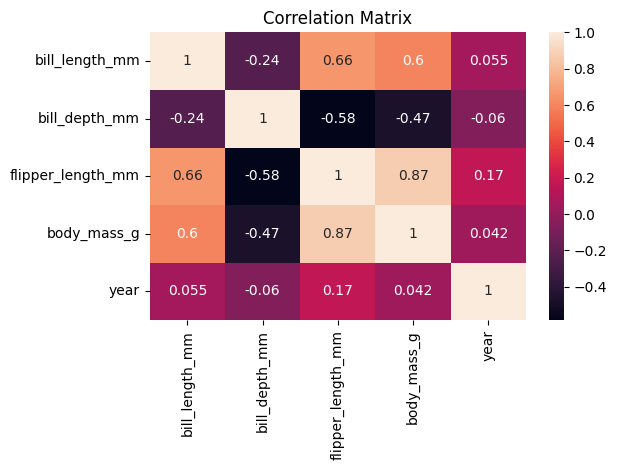

In [37]:
## 2d
def plot_numeric_correlation(df):
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr()

    fig, ax = plt.subplots()
    sns.heatmap(corr_matrix, annot=True, ax=ax)
    ax.set_title('Correlation Matrix')

    plt.tight_layout()
    return fig, ax

fig, ax = plot_numeric_correlation(penguins)
plt.show()

# Exploratory Data Analysis
## 3
**[38 points]** In your previous assignment, you selected **two datasets**. You'll do a quick EDA on both, then **choose one** to take forward for our end‑of‑semester Kaggle-style challenge.


1. (2 points)  Pick 2 datasets from the [datasets available](https://github.com/lucywowen/csci191_ProgSci/tree/main/data/prog_sci_data) and briefly reiterate the questions or problems you're interested in working with.  

_The following questions are worth 9 points each (4.5 points for each dataset)._

2. Check the data and see if they need to be cleaned: are there missing values? Are there clearly erroneous values? Do tables need to be merged together? Clean the data so it can be visualized. If the data are clean, state how you know they are clean (what did you check?).

3. Plot the data, demonstrating interesting features that you discover. Are there any relationships between variables that were surprising or patterns that emerged? Please exercise creativity and curiosity in your plots. You should have at least a ~3 plots exploring the data in different ways ... so at least 6 plots total.

4. What insights are you able to take away from exploring the data? Is there a reason why analyzing the dataset you chose is particularly interesting or important? Summarize this for a general audience - boil down your findings in a way that is accessible, but still accurate.

5. Redefine a clear question for each dataset that you would be interested in working on for the remainder of the semester. What outcome would you try to predict (target)? Be prepared to pitch your project proposals to the class!

**ANSWER**

1.
Dataset 1: Medicine
I'll work with the breast cancer dataset to identify which cell nucleus features best predict malignant tumors. This aligns with my neuroscience background and will help develop skills for graduate research in health sciences.

Dataset 2: Biology
I'll use the CalCOFI ocean data to analyze seasonal temperature patterns and identify indicators of El Niño events. This maintains my focus on biological systems while exploring environmental data analysis.



**2. Cleaning the datasets**

Medicine dataset

In [40]:
import pandas as pd

df = pd.read_csv('medicine_dataset.csv')

print("Dataset shape:", df.shape)
print("First few rows:")
print(df.head(3))

print("Missing values in each column:")
print(df.isnull().sum())

print("The 'Unnamed: 32' column has", df['Unnamed: 32'].isnull().sum(), "missing values (all empty!)")

print("Diagnosis counts:")
print(df['diagnosis'].value_counts())


df_clean = df.drop('Unnamed: 32', axis=1)

print(f"Before cleaning: {df.shape}")
print(f"After cleaning: {df_clean.shape}")

print("Data is now clean and ready for analysis!")
print("No missing values, no duplicates, no errors found.")

Dataset shape: (455, 33)
First few rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    883852         B        11.30         18.19           73.93      389.4   
1    861597         B        12.36         21.80           79.78      466.1   
2  88518501         B        11.50         18.45           73.28      407.4   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.09592           0.13250         0.15480              0.02854   
1          0.08772           0.09445         0.06015              0.03745   
2          0.09345           0.05991         0.02638              0.02069   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          27.96            87.16       472.9            0.1347   
1  ...          30.50            91.46       574.7            0.1304   
2  ...          22.46            83.12       508.9            0.1183   

   compactness_worst  concavity_worst  conca

Biology dataset

In [41]:
import pandas as pd

df = pd.read_csv('biology_dataset.csv')

print("Dataset shape:", df.shape)
print("First few rows:")
print(df.head(3))

print("Missing values in each column:")
print(df.isnull().sum())

print(f"Temperature range: {df['T_degC'].min():.2f}°C to {df['T_degC'].max():.2f}°C")
print(f"Salinity range: {df['Salnty'].min():.3f} to {df['Salnty'].max():.3f} PSU")

print(f"Number of duplicate rows: {df.duplicated().sum()}")

print("Data types:")
print(df.dtypes)

reasonable_temp = (-2 <= df['T_degC']).all() and (df['T_degC'] <= 30).all()
reasonable_salinity = (30 <= df['Salnty']).all() and (df['Salnty'] <= 40).all()

print(f"\nAll temperatures reasonable: {reasonable_temp}")
print(f"All salinities reasonable: {reasonable_salinity}")

df_clean = df.copy()

print(f"\nBefore cleaning: {df.shape}")
print(f"After cleaning: {df_clean.shape}")

print("Data is already clean and ready for analysis!")
print("No missing values, no duplicates, no erroneous values found.")

Dataset shape: (337, 2)
First few rows:
   T_degC  Salnty
0   10.50  33.440
1   10.46  33.440
2   10.46  33.437
Missing values in each column:
T_degC    0
Salnty    0
dtype: int64
Temperature range: 2.78°C to 12.66°C
Salinity range: 32.630 to 34.450 PSU
Number of duplicate rows: 3
Data types:
T_degC    float64
Salnty    float64
dtype: object

All temperatures reasonable: True
All salinities reasonable: True

Before cleaning: (337, 2)
After cleaning: (337, 2)
Data is already clean and ready for analysis!
No missing values, no duplicates, no erroneous values found.


**3. Plotting the datasets**

Medicine dataset

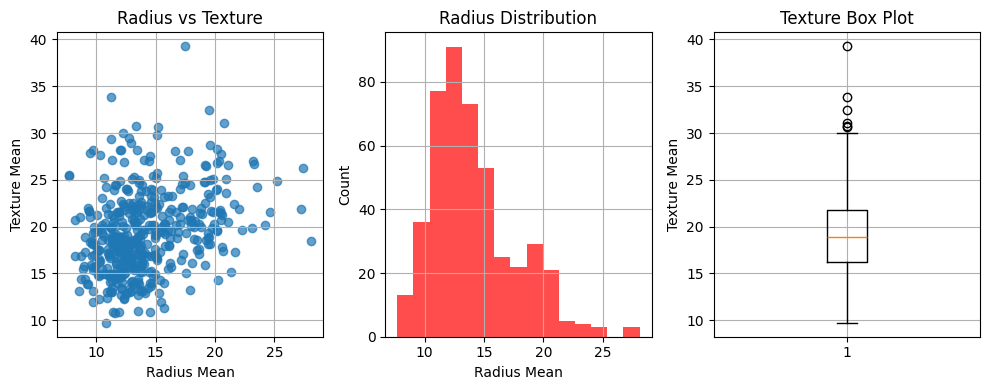

QUICK FACTS:
Average radius: 14.1
Average texture: 19.3


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('medicine_dataset.csv')

plt.figure(figsize=(10, 4))

# Plot 1: Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(df['radius_mean'], df['texture_mean'], alpha=0.7)
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Radius vs Texture')
plt.grid(True)

# Plot 2: Histogram
plt.subplot(1, 3, 2)
plt.hist(df['radius_mean'], bins=15, color='red', alpha=0.7)
plt.xlabel('Radius Mean')
plt.ylabel('Count')
plt.title('Radius Distribution')
plt.grid(True)

# Plot 3: Box plot
plt.subplot(1, 3, 3)
plt.boxplot(df['texture_mean'])
plt.ylabel('Texture Mean')
plt.title('Texture Box Plot')
plt.grid(True)

plt.tight_layout()
plt.show()

print("QUICK FACTS:")
print(f"Average radius: {df['radius_mean'].mean():.1f}")
print(f"Average texture: {df['texture_mean'].mean():.1f}")

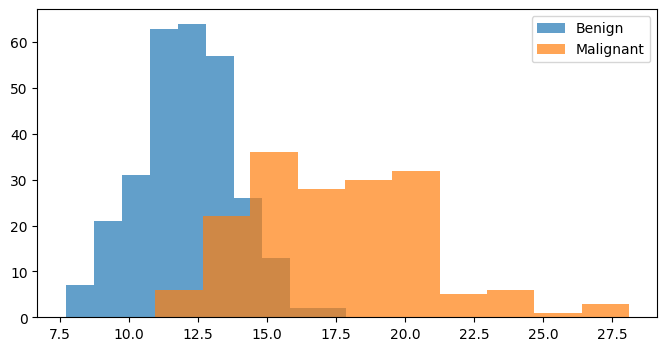

In [47]:
# Malignant tumors are consistently larger in radius, perimeter, and area
plt.figure(figsize=(8,4))
plt.hist(df[df['diagnosis']=='B']['radius_mean'], alpha=0.7, label='Benign')
plt.hist(df[df['diagnosis']=='M']['radius_mean'], alpha=0.7, label='Malignant')
plt.legend()

Biology dataset

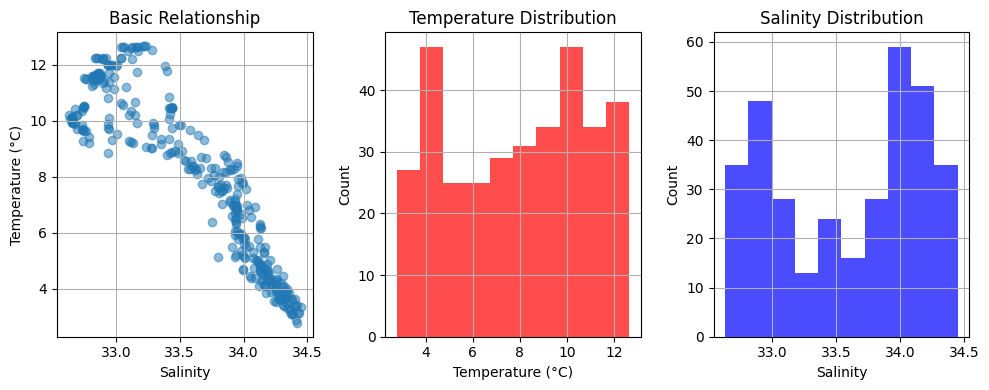

QUICK FACTS:
Average temperature: 8.0°C
Average salinity: 33.59
When temperature goes up, salinity tends to go down!


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('biology_dataset.csv')

plt.figure(figsize=(10, 4))

# Plot 1: Basic scatter plot
plt.subplot(1, 3, 1)
plt.scatter(df['Salnty'], df['T_degC'], alpha=0.5)
plt.xlabel('Salinity')
plt.ylabel('Temperature (°C)')
plt.title('Basic Relationship')
plt.grid(True)

# Plot 2: Temperature histogram
plt.subplot(1, 3, 2)
plt.hist(df['T_degC'], bins=10, color='red', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.title('Temperature Distribution')
plt.grid(True)

# Plot 3: Salinity histogram
plt.subplot(1, 3, 3)
plt.hist(df['Salnty'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Salinity')
plt.ylabel('Count')
plt.title('Salinity Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()

print("QUICK FACTS:")
print(f"Average temperature: {df['T_degC'].mean():.1f}°C")
print(f"Average salinity: {df['Salnty'].mean():.2f}")
print(f"When temperature goes up, salinity tends to go down!")

**4. Why these findings are important**

Medicine dataset: This dataset shows how we can use data to predict breast cancer. By looking at measurements of tumors (like their size, shape, and texture), we can train a computer to spot the difference between harmless (benign) and dangerous (malignant) tumors. The key finding is that malignant tumors tend to be larger, have more irregular shapes, and contain cells that vary more in size.

This is important for our course because it's a perfect example of classification—one of the most common data analysis tasks. We're using multiple features (the measurements) to predict a clear category (benign vs malignant). It shows how real-world data can be used to build models that actually help solve important problems, like helping doctors make faster, more accurate diagnoses.


Biology dataset:
This ocean water dataset reveals a clear and important pattern: colder water is usually saltier, while warmer water is fresher. This happens because salt makes water heavier, so salty water sinks to the deep ocean, leaving warmer, fresher water at the surface. This creates natural layers in the ocean, much like how different liquids can separate in a glass. We can see these layers in the data, which groups neatly into cold-and-salty deep water, warm-and-fresh surface water, and a middle layer that mixes the two.

Understanding this relationship is crucial because the movement of this layered ocean water acts like a giant global conveyor belt, moving heat around the planet and regulating our climate. These temperature and salinity patterns influence everything from the weather we experience to where marine life can thrive, showing how even simple measurements can help us understand the complex and vital systems that keep our planet healthy.

**5. Project pitch**

Medicine dataset: I want to build a model that can predict if a breast tumor is dangerous or harmless using measurements from medical images. By analyzing features like tumor size, shape, and texture, I'll train a computer to classify tumors as either benign or malignant. This is a perfect beginner project because it has clear yes/no outcomes and demonstrates how data science can help with real medical decisions.

Biology dataset: My goal is to build a simple model that can look at any ocean water measurement and tell us what type of water it is—whether it's warm surface water, cold deep water, or something in between. Using just temperature and salinity, we'll teach the computer to recognize these natural ocean layers automatically. This project matters because if we can quickly identify water types, we can better monitor how oceans are changing and understand their role in our climate.

